<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning**

DL is a subfield within ML that focuses on algorithms with neural networks.

<u>Using Keras and Tensorflow you'll learn how to</u>:
- create a fully-connected neural network architecture
- apply neural nets to two classic ML problems: regression and classification
- train neural nets with stochastic gradient descent, and
- improve performance with dropout, batch normalization, and other techniques

**Neural networks** = black box models (no insight to relationships)
- no interpretability but powerful predictor for complex nonlinear patterns
- used for classification and continuous predictions
- variables are in layers (some are hidden) and intercept is called bias
- inputs in first layer are transformed via some mathematical fx and propagated to the next hidden layer until it is fed to the output layer
- single neuron models (1 input) are linear models!
- NN with two inputs will fit a plane (with more inputs than that will fit a hyperplane)
- key advantage = ability to automatically create relevant features from initial inputs

DNN Structure:
- input layer
- 2 or more hidden layers
- output layer
- edges connecting neurons between adjacent layers
- activation values and bias at each neuron
 - bias measures how easy/difficult it is for a neuron to fire (higher bias = more input or activation neuron needs to fire)
- weights on each edge
 - weights define importance of inputs
 - if sum of inputs*weights exceeds the bias (threshold), the neuron fires 1 otherwise it fires 0

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

## **A single neuron**

In [ ]:
red_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML concepts/Deep Learning/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine.shape

(1599, 12)

The target is `quality` and remaining variables are inputs.

In [ ]:
# Create a network with 1 linear unit (units = number of outputs, input_shape = number of features)
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

Keras represent weights as tensors (TF's version of numpy array that are  compatible with GPU/TPU accelerators)

In [ ]:
w, b = model.weights

In [ ]:
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.3745501 ],
       [ 0.06192517],
       [ 0.5891747 ],
       [-0.60507095],
       [ 0.4141553 ],
       [-0.2727223 ],
       [ 0.64339393],
       [ 0.18061072],
       [-0.07313913],
       [-0.6408189 ],
       [-0.18140608]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


NOTE: there's one weight for each input (and a bias). There doesn't seem to be any pattern to the values the weights have. Before the model is trained, the weights are set to random numbers (and the bias to 0.0). A neural network learns by finding better values for its weights.

**Plot the output of an untrained linear model**

Run the cell below a few times to see the different lines produced with a random initialization (model's weights are set randomly before training).

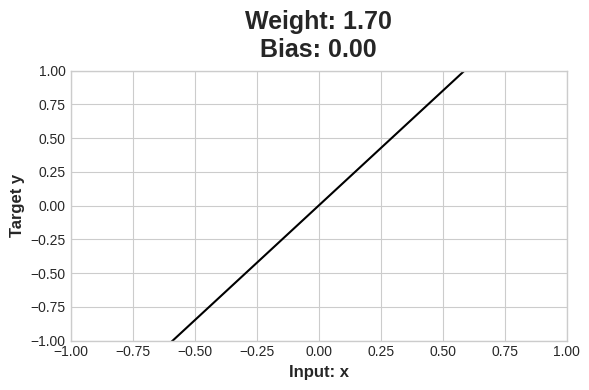

In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

## **Intro to DNNs**

Activation functions allow NNs to learn complex nonlinear patterns (instead of only linear relationships). In order to fit curves, apply activation functions to each of a layer's outputs (its activations). The most common is the rectifier function  `max(0,x)`.

- ReLU = rectified fx applied to linear unit
- ReLU "rectifies" negative values to 0 and creates a "bend" in the data

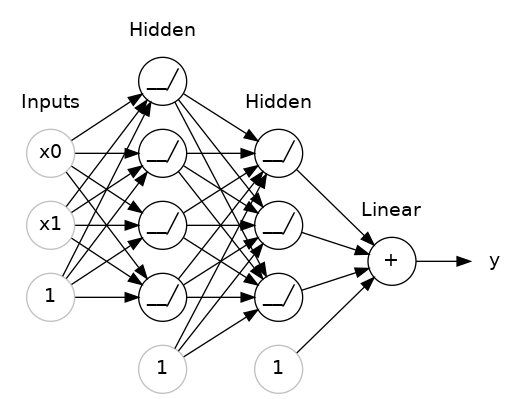

In [ ]:
# Build sequential models (image above)

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In [ ]:
concrete = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML concepts/Features   Pipelines/Concrete_Data.xls')
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


The target for this task is the column `'CompressiveStrength'`. The remaining columns are the features we'll use as inputs.

Create a model with **three hidden layers**, each having *512 units* and the *ReLU activation*. Be sure to include an output layer of one unit and no activation, and also `input_shape=[8]` as an argument to the first layer.

In [ ]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[8]), # layer 1
    layers.Dense(units=512, activation='relu'), # layer 2
    layers.Dense(units=512, activation='relu'), # layer 3
    layers.Dense(units=1), # output layer
])

Another way to apply activation function is to define it in its own activation layer (use when you want to put some other layer between the Dense layer and its activation function).

In [ ]:
# This model is equivalent to....
model = keras.Sequential([
                          
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),

    layers.Dense(32),
    layers.Activation('relu'),

    layers.Dense(1),
])


# ...this model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[8]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

There are different activation functions that you can try to see which is the best. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. 

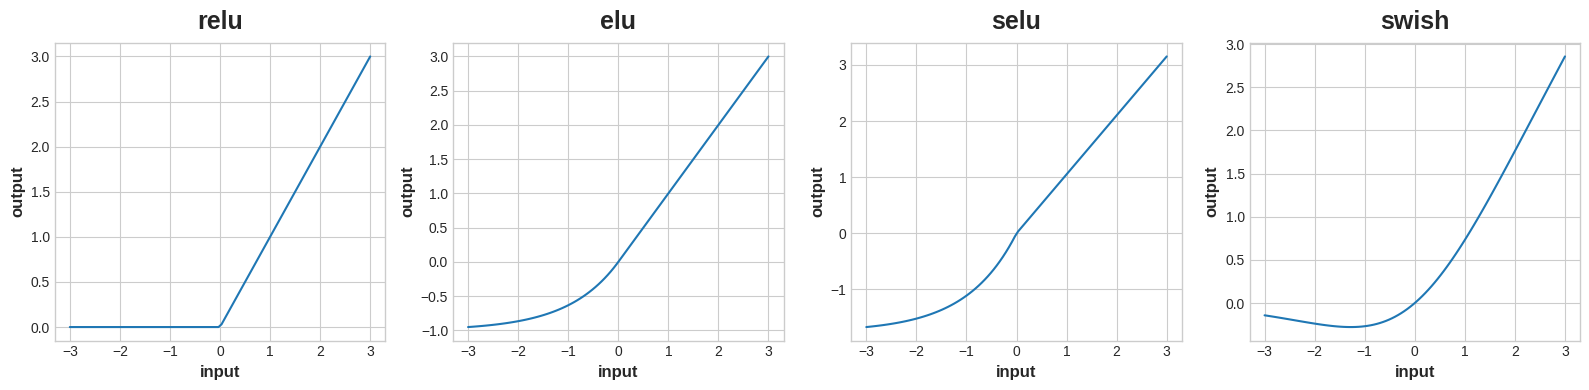

In [ ]:
# create various activation layers
relu_activation_layer = layers.Activation('relu')
elu_activation_layer = layers.Activation('elu')
selu_activation_layer = layers.Activation('selu')
swish_activation_layer = layers.Activation('swish')

# inputs
x = tf.linspace(-3.0, 3.0, 100)

fig = plt.figure(figsize=(16,4), dpi=100)
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

# once created, a layer is callable just like a function
ax1.plot(x, relu_activation_layer(x))
ax2.plot(x, elu_activation_layer(x))
ax3.plot(x, selu_activation_layer(x))
ax4.plot(x, swish_activation_layer(x))

ax1.set_title('relu')
ax1.set_xlabel('input')
ax1.set_ylabel('output')
ax2.set_title('elu')
ax2.set_xlabel('input')
ax2.set_ylabel('output')
ax3.set_title('selu')
ax3.set_xlabel('input')
ax3.set_ylabel('output')
ax4.set_title('swish')
ax4.set_xlabel('input')
ax4.set_ylabel('output')
plt.show()

## **Stochastic Gradient Descent**

What you need to train a neural network:
- training data
- "loss function" that measures how good the network's predictions are
- "optimizer" that can tell the network how to change its weights

<u>Loss function</u>
- tells NN what problem to solve
- measures disparity between the the target's true value and model prediction
- common loss functions for regression problems are MAE, MSE, Huber Loss

<u>Optimizer</u>
- tells NN how to solve problem
- iterative algorithm that adjusts the weights to minimize the loss
- these algorithms fall under stochastic gradient descent family
- Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning ("self tuning" in a sense and great general-purpose optimizer)

<u>Training Steps</u>:
1. Sample some training data ("minibatch") and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Adjust the weights in a direction that makes the loss smaller.
 - learning rate and batch size are parameters that have greatest impact on SGD training
 - smaller learning rate means the network needs to see more minibatches before its weights converge to their best values
4. Repeat until the loss is as small as you like (or until it won't decrease any further.)

**Epoch** = complete round of the training data<br>
**Batch** = sample of training data for each iteration

***

Back to red wine example:

In [ ]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
# We chose a three-layer network with over 1500 neurons
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [ ]:
# After defining the model, compile in the optimizer and loss fx
model.compile(
    optimizer='adam',
    loss='mae',
)

Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (`batch_size`) and to do that 10 times all the way through the dataset (`epochs`).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 70ms/step - loss: 0.2728 - val_loss: 0.1353
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1473 - val_loss: 0.1240
Epoch 3/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1264 - val_loss: 0.1147
Epoch 4/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1155 - val_loss: 0.1099
Epoch 5/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1128 - val_loss: 0.1073
Epoch 6/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1071 - val_loss: 0.1036
Epoch 7/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1050 - val_loss: 0.1090
Epoch 8/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1043 - val_loss: 0.1014
Epoch 9/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1025 - val_loss: 0.1021
Epoch 10/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1008 - val_loss: 0.1066


You can see the progress of the loss values but visualizing is easier.



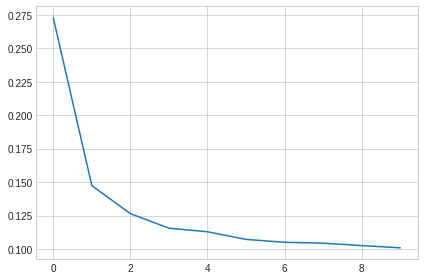

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

### Fuel Economy Example

Predict the fuel economy of an automobile given features like its type of engine or the year it was made.

In [2]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [4]:
fuel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML concepts/Deep Learning/fuel.csv')
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [5]:
# Define target and inputs
X = fuel.copy()
y = X.pop('FE')

In [6]:
# Make preprocessing pipeline
preprocessor = make_column_transformer(
    # standardize numeric cols
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    # one-hot encode categorical cols
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [7]:
# See processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Define NN to use
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [9]:
# Define the loss (MAE) and optimizer (Adam) using the compile method
model.compile(optimizer='adam', loss='mae')

In [10]:
# Once you've defined the model and compiled it with a loss and optimizer --> train model
# Train the network for 200 epochs with a batch size of 128. The input data is X with target y.

history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 1s 5ms/step - loss: 2.8096
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0130
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5384
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3335
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2232
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1791
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1412
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1219
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0845
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0825
Epoch 13/200
9/9 [==============================] - 0s 4ms/st

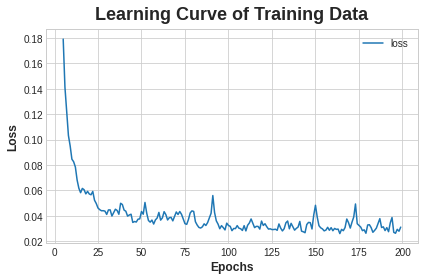

In [15]:
# Look at the loss curves and evaluate the training
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot(title='Learning Curve of Training Data', xlabel='Epochs', ylabel='Loss');

The loss seems to have plateaued, so there would be no advantage of further training with additional epochs. Conversely, if the loss appeared to still be decreasing, then training for longer could be advantageous.

***

With the learning rate and the batch size, you have some control over:
- How long it takes to train a model
- How noisy the learning curves are
- How small the loss becomes

**Smaller batch sizes** = **noisier** weight updates and loss curves. 

(Smaller samples tend to give noisier estimates but can have an "averaging" effect which can be beneficial.)

**Smaller learning rates** = **smaller** weight updates/loss curves and training takes longer to converge. 

(Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely)

## **Overfitting and Underfitting**

We need to see learning curves from both training and validation data to accurately asssess model performance and choose best parameters.

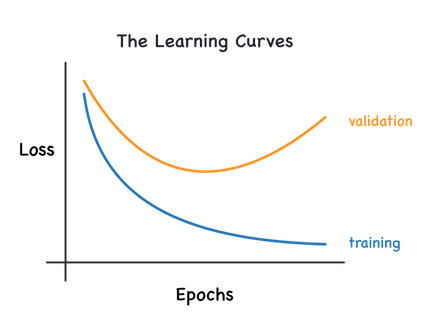

The training curve will continue decreasing regardless of the model learning signal or noise whereas the validation curve will only decrease when it learns signal. You have to find an optimal tradeoff that will give best results on unseen data.

### <u>Terminology</u>:
- **Underfitting** = training set is when the loss is not as low as it could be because the model hasn't learned enough signal
- **Overfitting** = training set is when the loss is not as low as it could be because the model learned too much noise
- **Capacity** = size and complexity of patterns a model is able to learn
 - *increase capacity* when model is *underfitting*
 - 2 ways to increase capacity = make wider and/or deeper
 - **wider** = more units to existing layers (easier to learn more linear patterns)
 - **deeper** = add more layers (easier to learn more nonlinear patterns)


In [16]:
# Baseline model
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

# Wider model (more units)
wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

# Deeper (more layers)
deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])